# Agricultural production optimization Model 
Task : To build a predictive model to predict the most suitable crop under given soil and climatic condition.Project is intending on Precision Farming.

In [74]:
#For manipulations
import numpy as np
import pandas as pd
# for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
data=pd.read_csv('data.csv')

In [5]:
data.shape

(2200, 8)

In [6]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [7]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [8]:
data['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [73]:
import warnings
warnings.filterwarnings('ignore')
crops = list(data['label'].value_counts().index)
data['label']

0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: object

<AxesSubplot:xlabel='P', ylabel='Density'>

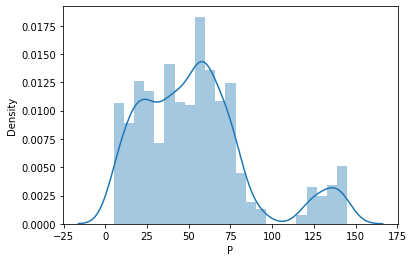

In [31]:
sns.distplot(data['P'])

<AxesSubplot:xlabel='N', ylabel='Density'>

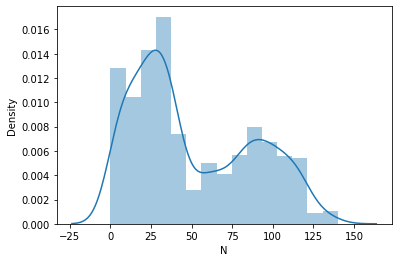

In [32]:
sns.distplot(data['N'])

<AxesSubplot:xlabel='K', ylabel='Density'>

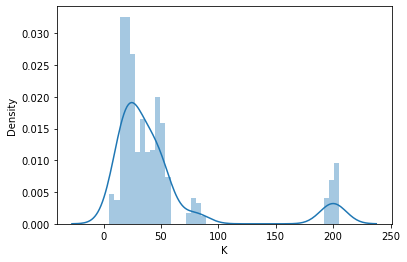

In [33]:
sns.distplot(data['K'])

<AxesSubplot:xlabel='temperature', ylabel='Density'>

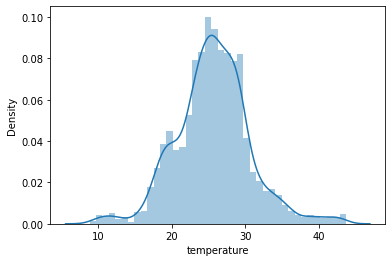

In [35]:
sns.distplot(data['temperature'])

<AxesSubplot:xlabel='humidity', ylabel='Density'>

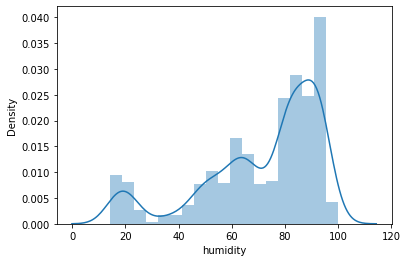

In [36]:
sns.distplot(data['humidity'])

<AxesSubplot:xlabel='ph', ylabel='Density'>

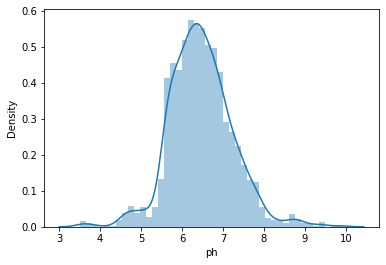

In [37]:
sns.distplot(data['ph'])

<AxesSubplot:>

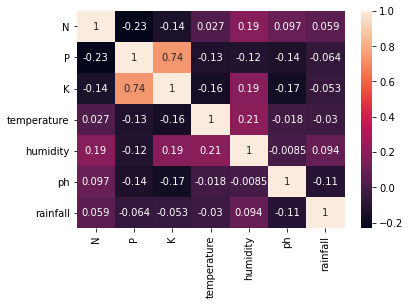

In [39]:
sns.heatmap(data.corr(), annot=True )

In [40]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [43]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)

print("Logistic Regression's Accuracy :", acc)

Logistic Regression's Accuracy : 0.9636363636363636


In [46]:
# Cross validation score
from sklearn.model_selection import cross_val_score
score = cross_val_score(classifier, X, y, cv=5)
score

array([0.95      , 0.96590909, 0.94772727, 0.96590909, 0.94318182])

In [47]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.87      0.91      0.89        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.94      1.00      0.97        16
      grapes       1.00      1.00      1.00        18
        jute       0.87      0.95      0.91        21
 kidneybeans       0.95      1.00      0.98        20
      lentil       0.82      0.82      0.82        17
       maize       1.00      0.94      0.97        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.95      0.84      0.89        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       0.96      1.00      0.98        23
      orange       1.00      1.00      1.00        23
      papaya       0.95    

# Support Vector Machine (SVM)

In [48]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)

print("Support Vector Machine's Accuracy :", acc)

Support Vector Machine's Accuracy : 0.9863636363636363


In [49]:
# Cross validation score
from sklearn.model_selection import cross_val_score
score = cross_val_score(classifier, X, y, cv=5)
score

array([0.98181818, 0.98863636, 0.98863636, 0.98181818, 0.98409091])

In [50]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       1.00      1.00      1.00        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        16
      grapes       1.00      1.00      1.00        18
        jute       0.91      0.95      0.93        21
 kidneybeans       0.95      1.00      0.98        20
      lentil       0.94      0.94      0.94        17
       maize       1.00      1.00      1.00        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.96      0.96      0.96        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

# K-Nearest Neighbours

In [51]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=10, metric='minkowski', p=2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)

print("K-Nearest Neighbours's Accuracy :", acc)

K-Nearest Neighbours's Accuracy : 0.9613636363636363


In [52]:
# Cross validation score
from sklearn.model_selection import cross_val_score
score = cross_val_score(classifier, X, y, cv=5)
score

array([0.96590909, 0.975     , 0.97954545, 0.96590909, 0.97045455])

In [53]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.88      0.95      0.91        22
    chickpea       1.00      1.00      1.00        23
     coconut       0.94      1.00      0.97        15
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        16
      grapes       1.00      1.00      1.00        18
        jute       0.78      1.00      0.88        21
 kidneybeans       0.95      1.00      0.98        20
      lentil       0.89      0.94      0.91        17
       maize       1.00      1.00      1.00        18
       mango       0.91      1.00      0.95        21
   mothbeans       1.00      0.92      0.96        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      0.87      0.93        23
      papaya       1.00    

# Random Forest Classification

In [54]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)

print("Random Forest Classification's Accuracy :", acc)

Random Forest Classification's Accuracy : 0.9954545454545455


In [55]:
# Cross validation score
from sklearn.model_selection import cross_val_score
score = cross_val_score(classifier, X, y, cv=5)
score

array([0.99545455, 0.99090909, 0.99545455, 0.99318182, 0.98863636])

In [56]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.96      1.00      0.98        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        16
      grapes       1.00      1.00      1.00        18
        jute       0.95      1.00      0.98        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        17
       maize       1.00      1.00      1.00        18
       mango       1.00      1.00      1.00        21
   mothbeans       1.00      0.96      0.98        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

In [58]:
#Since Random forest gives highest accuracy its best for predicting crop